<a href="https://colab.research.google.com/github/xchewtoyx/data-science-projects/blob/main/1_1_3_Data_Statistics_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels import api as sm

# 3. Descriptive Statistics Report

Stats, Python/DS

Choose a real dataset (like the College or Auto data set) and generate a numerical summary, including mean, standard deviation, and interquartile range (IQR) [13-16]. Use Python to produce histograms and boxplots to visualize the distribution shape [17, 18].


## Auto dataset

| Field Name     | Type          | Meaning                                            |
| -------------- | ------------- | -------------------------------------------------- |
| `mpg`          | Float         | Miles per gallon.                                  |
| `cylinders`    | Integer       | Number of cylinders in the engine.                 |
| `displacement` | Float         | Engine displacement (cubic inches).                |
| `horsepower`   | Float         | Engine horsepower.                                 |
| `weight`       | Integer       | Vehicle weight (pounds).                           |
| `acceleration` | Float         | Time to accelerate from 0 to 60 mph (seconds).     |
| `year`         | Integer       | Model year (last two digits).                      |
| `origin`       | Integer (1–3) | Region of origin: 1 = U.S., 2 = Europe, 3 = Japan. |
| `name`         | String        | Car name (model and make).                         |


In [3]:
# auto_df = pd.read_parquet('/work/Rdatasets/parquet/ISLR/Auto.parquet')
# auto_df = auto_df.set_index('rownames')
auto_df = sm.datasets.get_rdataset("Auto", "ISLR").data
display(auto_df.head(), auto_df.describe())


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
rownames,,,,,,,,,
1,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
3,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
4,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
5,17.0,8,302.0,140,3449,10.5,70,1,ford torino


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Auto Dataset
1. **mpg (Miles per Gallon)**: A key feature for understanding fuel efficiency. Use histograms or boxplots to show its distribution.
2. **horsepower**: Important for performance analysis. Scatter plots with mpg can reveal trends.
3. **weight**: Correlates with mpg and performance. Scatter plots with mpg or histograms can be insightful.
4. **cylinders**: A categorical feature that can be visualized using bar plots to show frequency or its relationship with mpg.
5. **year**: Useful for analyzing trends over time. Line plots or grouped boxplots can work well.

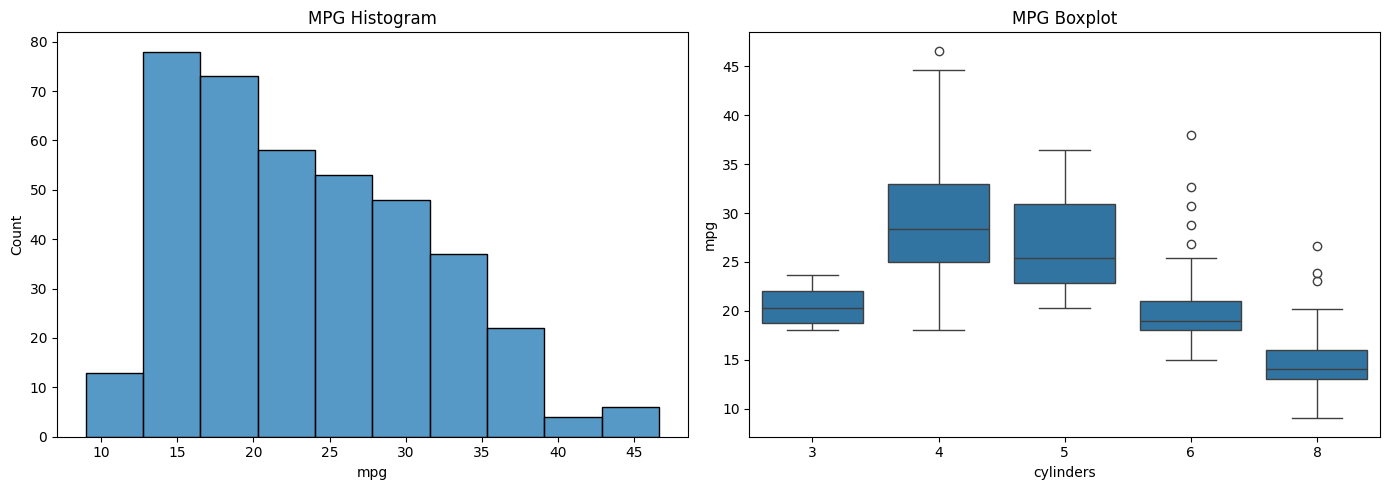

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(auto_df, x="mpg", bins=10, ax=axes[0])
axes[0].set_title("MPG Histogram")

sns.boxplot(auto_df, y="mpg", x="cylinders", ax=axes[1])
axes[1].set_title("MPG Boxplot")

plt.tight_layout()
plt.show()

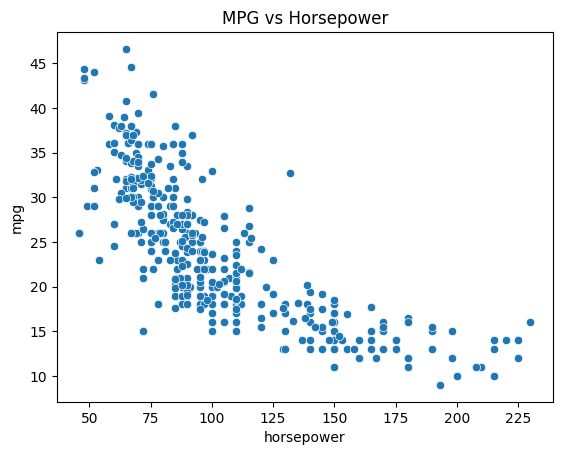

In [5]:
sns.scatterplot(auto_df, x="horsepower", y="mpg")
plt.title("MPG vs Horsepower")
plt.show()

In [6]:
# Simple regression using statsmodels
X_sm_simple = sm.add_constant(auto_df['weight'])
ols_simple = sm.OLS(auto_df['mpg'], X_sm_simple).fit()
print(ols_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          6.02e-102
Time:                        06:28:19   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.0

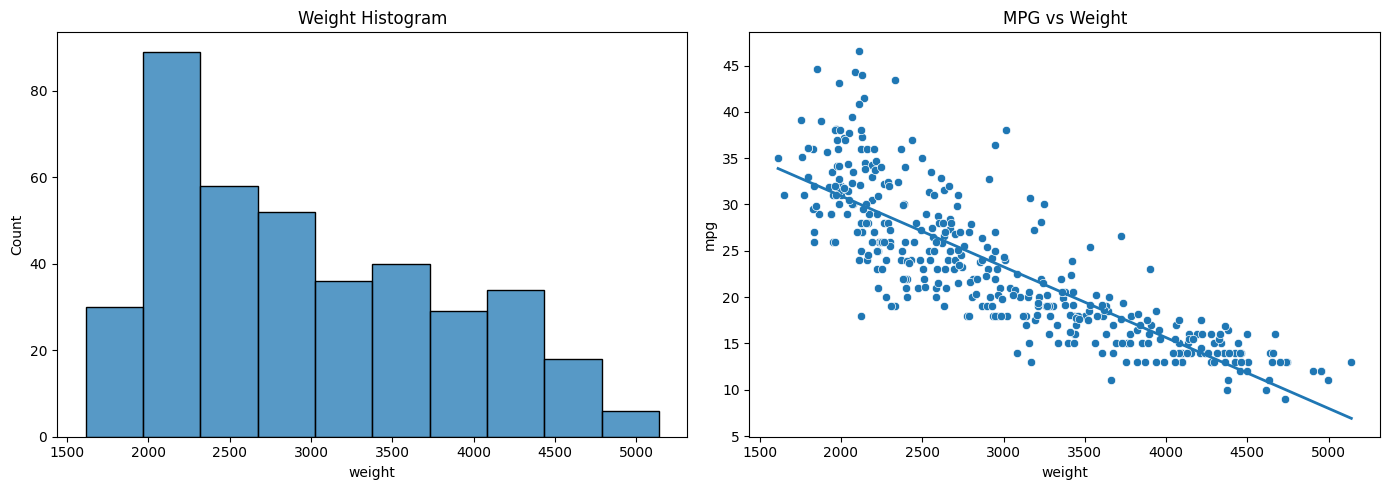

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(auto_df, x="weight", bins=10, ax=axes[0])
axes[0].set_title("Weight Histogram")

sns.scatterplot(auto_df, x="weight", y="mpg", ax=axes[1])

# 2. Generate predicted line
x_sorted = auto_df.weight.sort_values()
X_pred = sm.add_constant(x_sorted)
y_pred = ols_simple.predict(X_pred)

# 3. Plot scatter + regression line
axes[1].plot(x_sorted, y_pred, linewidth=2)

axes[1].set_title("MPG vs Weight")

plt.tight_layout()
plt.show()

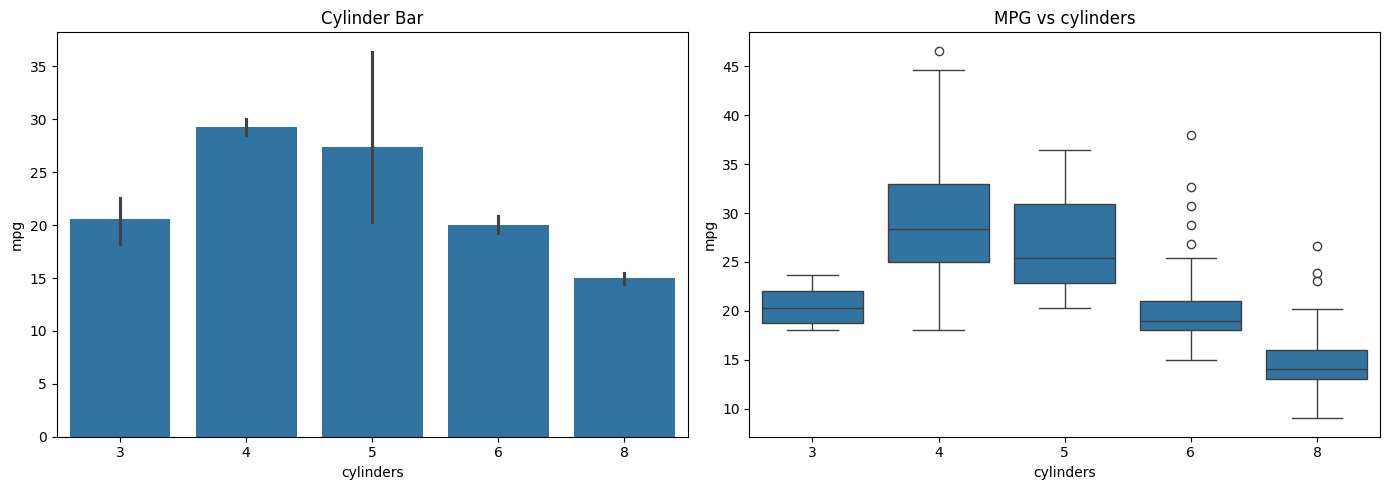

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(auto_df, x="cylinders", y="mpg", ax=axes[0])
axes[0].set_title("Cylinder Bar")

sns.boxplot(auto_df, x="cylinders", y="mpg", ax=axes[1])
axes[1].set_title("MPG vs cylinders")

plt.tight_layout()
plt.show()

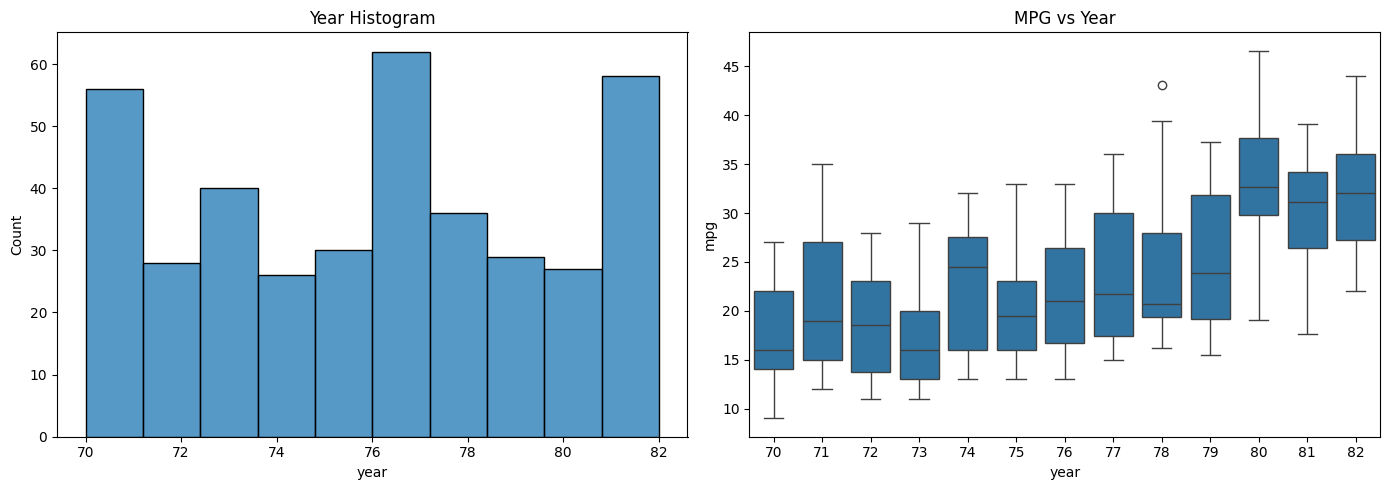

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(auto_df, x="year", bins=10, ax=axes[0])
axes[0].set_title("Year Histogram")

sns.boxplot(auto_df, x="year", y="mpg", ax=axes[1])
axes[1].set_title("MPG vs Year")

plt.tight_layout()
plt.show()

In [10]:
# Multiple regression using statsmodels
X_sm_multi = sm.add_constant(auto_df[['weight', 'horsepower']])
ols_multi = sm.OLS(auto_df['mpg'], X_sm_multi).fit()
print(ols_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 01 Dec 2025   Prob (F-statistic):          3.06e-104
Time:                        06:28:20   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

<Figure size 640x480 with 0 Axes>

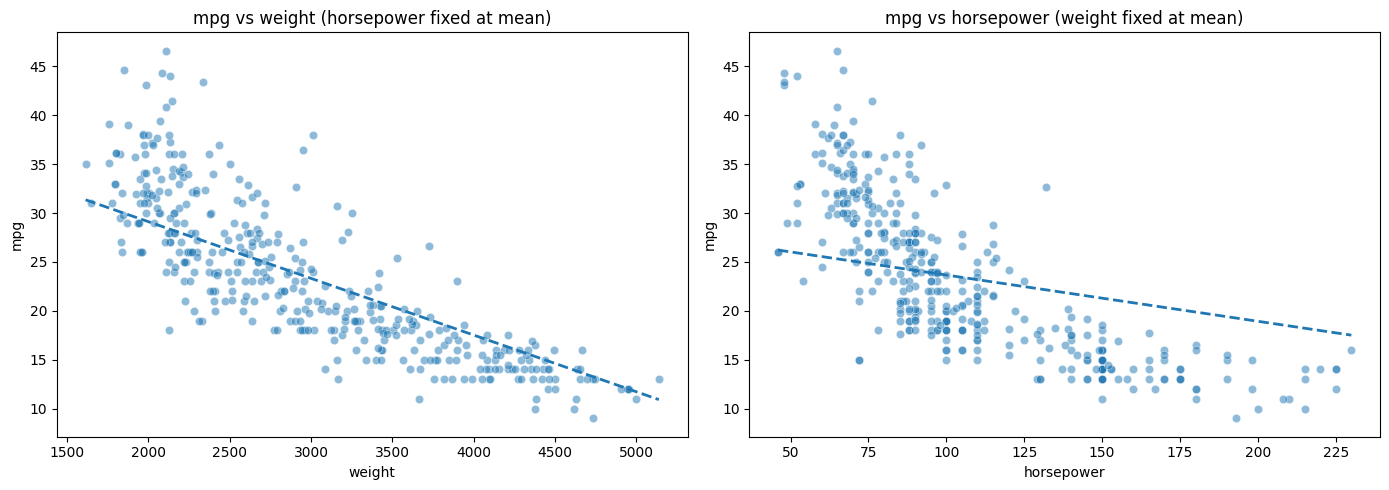

In [40]:
# Build a grid over weight, hold horsepower at its mean
hp_grid = np.linspace(auto_df['horsepower'].min(), auto_df['horsepower'].max(), 100)
hp_mean = auto_df['horsepower'].mean()

wt_grid = np.linspace(auto_df['weight'].min(), auto_df['weight'].max(), 100)
wt_mean = auto_df['weight'].mean()

wt_grid_df = pd.DataFrame({
    'weight': wt_grid,
    'horsepower': hp_mean
})

X_wt_grid = sm.add_constant(wt_grid_df, has_constant="add")
mpg_pred_wt = ols_multi.predict(X_wt_grid)

hp_grid_df = pd.DataFrame({
    'weight': wt_mean,
    'horsepower': hp_grid
})
X_hp_grid = sm.add_constant(hp_grid_df, has_constant="add")
mpg_pred_hp = ols_multi.predict(X_hp_grid)

# Plot: scatter of data + model line
# As a precaution against lingering matplotlib state issues, ensure previous plots are cleared.
plt.clf() # Clears the current figure, useful in interactive environments.
fig_multi, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.scatterplot(data=auto_df, x='weight', y='mpg', alpha=0.5, ax=axes[0])
axes[0].plot(wt_grid, mpg_pred_wt, linewidth=2, linestyle="--")
axes[0].set_xlabel('weight') # Corrected: use set_xlabel
axes[0].set_ylabel('mpg') # Corrected: use set_ylabel
axes[0].set_title('mpg vs weight (horsepower fixed at mean)') # Corrected: use set_title

sns.scatterplot(data=auto_df, x='horsepower', y='mpg', alpha=0.5, ax=axes[1])
axes[1].plot(hp_grid, mpg_pred_hp, linewidth=2, linestyle="--")
axes[1].set_xlabel('horsepower')
axes[1].set_ylabel('mpg')
axes[1].set_title('mpg vs horsepower (weight fixed at mean)')

plt.tight_layout()
plt.show()


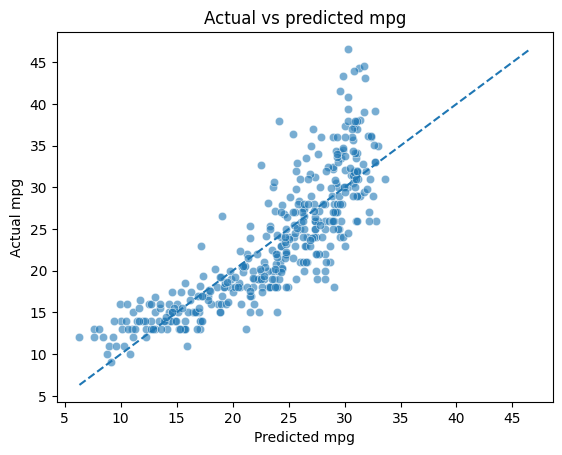

In [39]:
auto_df = auto_df.copy()
auto_df['mpg_pred'] = ols_multi.predict(X_sm_multi)

sns.scatterplot(data=auto_df, x='mpg_pred', y='mpg', alpha=0.6)
# 45-degree line
lims = [
    min(auto_df['mpg'].min(), auto_df['mpg_pred'].min()),
    max(auto_df['mpg'].max(), auto_df['mpg_pred'].max())
]

plt.plot(lims, lims, linestyle='--')
plt.xlabel('Predicted mpg')
plt.ylabel('Actual mpg')
plt.title('Actual vs predicted mpg')
plt.show()

## College dataset

| Field Name    | Type                      | Meaning                                                               |
| ------------- | ------------------------- | --------------------------------------------------------------------- |
| `Private`     | Categorical (Yes/No)      | Indicates whether the institution is private.                         |
| `Apps`        | Integer                   | Number of applications received.                                      |
| `Accept`      | Integer                   | Number of applicants accepted.                                        |
| `Enroll`      | Integer                   | Number of new students enrolled.                                      |
| `Top10perc`   | Integer (percentage)      | Percentage of new students in the top 10% of their high school class. |
| `Top25perc`   | Integer (percentage)      | Percentage of new students in the top 25% of their high school class. |
| `F.Undergrad` | Integer                   | Number of full-time undergraduates.                                   |
| `P.Undergrad` | Integer                   | Number of part-time undergraduates.                                   |
| `Outstate`    | Integer (USD)             | Out-of-state tuition.                                                 |
| `Room.Board`  | Integer (USD)             | Room and board cost.                                                  |
| `Books`       | Integer (USD)             | Estimated books cost.                                                 |
| `Personal`    | Integer (USD)             | Estimated personal spending.                                          |
| `PhD`         | Integer (percentage)      | Percentage of faculty with a PhD.                                     |
| `Terminal`    | Integer (percentage)      | Percentage of faculty with terminal degrees.                          |
| `S.F.Ratio`   | Float                     | Student–faculty ratio.                                                |
| `perc.alumni` | Integer (percentage)      | Percentage of alumni who donate.                                      |
| `Expend`      | Integer (USD per student) | Instructional expenditure per student.                                |
| `Grad.Rate`   | Integer (percentage)      | Graduation rate.                                                      |


In [13]:
# college_df = pd.read_parquet('/work/Rdatasets/parquet/ISLR/College.parquet')
# college_df = college_df.set_index('rownames')
college_df = sm.datasets.get_rdataset("College", "ISLR").data
display(college_df.head(), college_df.describe())


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
rownames,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


### College Dataset

1. **Apps (Applications)**: Indicates popularity. Histograms or bar plots can show distribution or trends.
2. **Accept (Acceptance)**: Paired with Apps, it can show acceptance rates. Scatter plots or bar plots are useful.
3. **Outstate (Out-of-State Tuition)**: Key for financial analysis. Boxplots or histograms can show its distribution.
4. **Grad.Rate (Graduation Rate)**: Important for evaluating college performance. Scatter plots with Outstate or histograms can be insightful.
5. **Room.Board (Room and Board Costs)**: Useful for cost analysis. Pair with Outstate in scatter plots or visualize its distribution.

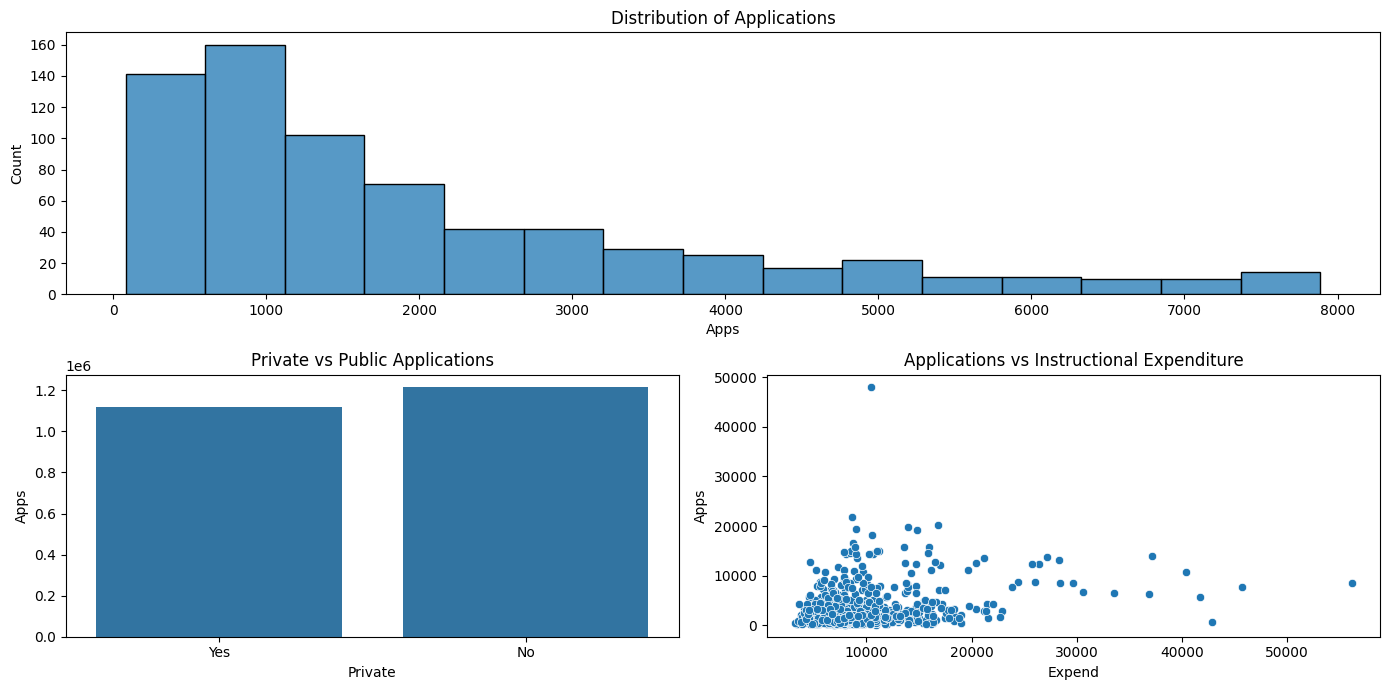

In [45]:
fig = plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(2, 2)

axes = [
  fig.add_subplot(gs[0, :]),   # top row spans both columns
  fig.add_subplot(gs[1, 0]),
  fig.add_subplot(gs[1, 1]),
]

def filter_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

sns.histplot(filter_outliers(college_df, "Apps"), x="Apps", bins=15, ax=axes[0])
axes[0].set_title("Distribution of Applications")

sns.barplot(college_df, x="Private", y="Apps", estimator=sum, errorbar=None, ax=axes[1])
axes[1].set_title("Private vs Public Applications")

sns.scatterplot(college_df, x="Expend", y="Apps", ax=axes[2])
axes[2].set_title("Applications vs Instructional Expenditure")

plt.tight_layout()
plt.show()